In [1]:
from modules.utils import *
from modules.PageExtractor import *
#from PageExtractor import *



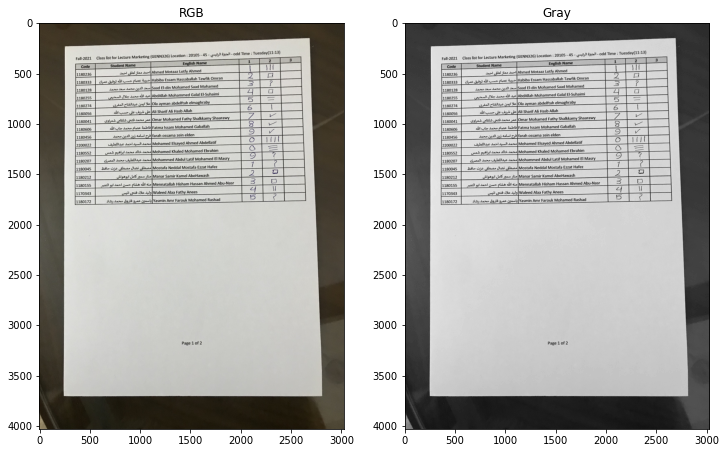

In [2]:
 # =========================================Read Image==========================================

# Reading image BGR
img_BGR=cv2.imread('./Data set/grade sheet/1.jpg', cv2.IMREAD_COLOR)

# Converting BGR color to RGB color format
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

# Converting image to gary scale (0-255)
img_gray = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)
# print("max",np.max(img_gray))

# Show Images
show_images([img_RGB,img_gray],titles=['RGB','Gray'])


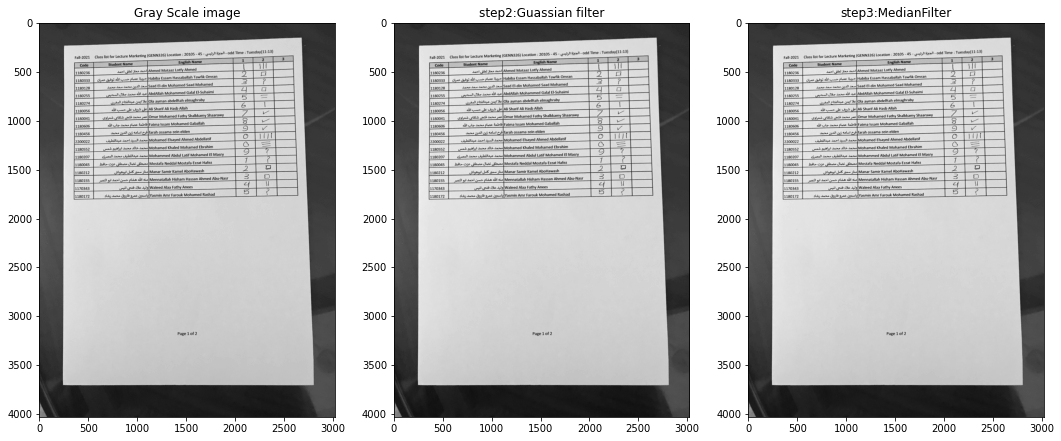

In [3]:
# =========================================PreProcessing==========================================

# Guassian Filter on the image to remove noise
# Gray Scale image,Kernel size(postive and odd),Sigma
Blurred_image_Guassian=cv2.GaussianBlur(img_gray,(5,5),1)

# Median Filter to remove Salt and Pepper
# non-linear Filtering technique => takes median of all pixels in the kernel and replaces the central element with this median value =>To reduce salt and pepper
# Image-Kernel size
Blurred_image_Median=cv2.medianBlur(img_gray, 5)

show_images([img_gray,Blurred_image_Guassian,Blurred_image_Median],titles=['Gray Scale image','step2:Guassian filter','step3:MedianFilter'])


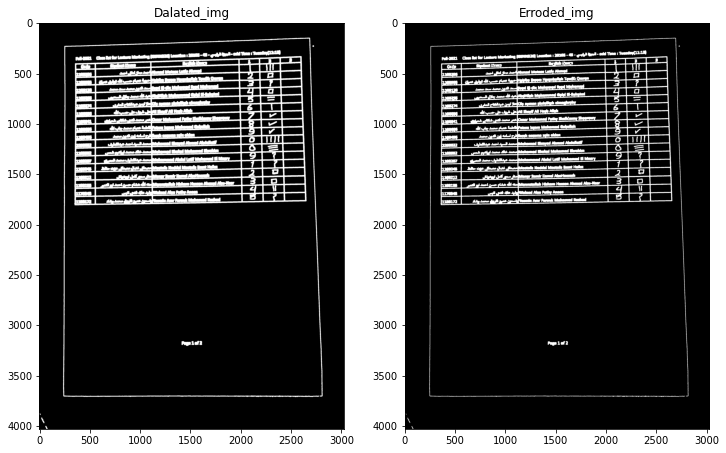

In [4]:
# =========================================Edge Detection==========================================
# Edge Dectrion using Canny (Optimal Edge Detector)
# Steps of Algorithm
#1.Guassian Smoothing:
#2.Sobel: to get first derivative in horizontal direction (Gx) and vertical direction (Gy) => the n it finds find edge gradient and direction for each pixel as follows:
# Edge_Gradient(G)=root(G2x+G2y),Angle(θ)=tan−1(Gy/Gx)
#3.Non Maxima Supression: to get rid of Double response of edges [Thin Edges] ie pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. 
#4.Hysteresis Thresholding:decides which are all edges are really edges and which are not Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity.
# Image(GrayScale),MinThreshold,MaxThreshold for hystresis Thresholding
Edged_Image=cv2.Canny(Blurred_image_Median,180,255)

#Aplly Closing (Dialtion - Errsoion) [Poor Results => we need more Dialation the Errosion]
# =>closing small holes inside the foreground objects, or small black points on the object.
# Closed_img = cv.morphologyEx(Edged_Image, cv.MORPH_CLOSE, (7,7))
# show_images([Edged_Image,Closed_img],titles=['Canny Edged Image(Disconnected Edges :( )','After Closing'])

kernel = np.ones((5,5),np.uint8)
Dilated_img = cv2.dilate(Edged_Image,kernel,iterations=2)
Erroded_img = cv2.erode(Dilated_img,kernel,iterations=1)
show_images([Dilated_img,Erroded_img],titles=['Dalated_img','Erroded_img'])



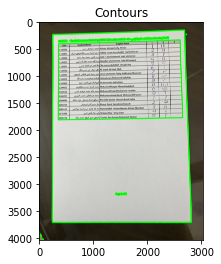

0 Area: 176.0
1 Area: 323.0
2 Area: 74.5
3 Area: 2392.0
4 Area: 470.0
5 Area: 587.5
6 Area: 1028.0
7 Area: 4177.0
8 Area: 3221437.0
9 Area: 2290.0
10 Area: 1390.5
11 Area: 2950.5
12 Area: 1238.0
13 Area: 4584.0
14 Area: 107.5
15 Area: 178.0
16 Area: 109.5
17 Area: 5808.0
18 Area: 3564.0
19 Area: 128.0
20 Area: 3169.0
21 Area: 1185.0
22 Area: 2436.5
23 Area: 190.5
24 Area: 2133.0
25 Area: 1761.0
26 Area: 2040.0
27 Area: 7198.0
28 Area: 90.0
29 Area: 52072.5
3221437.0


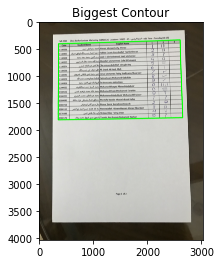

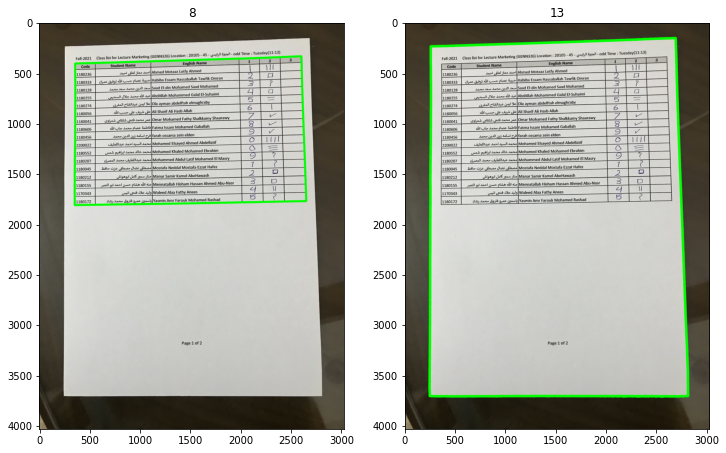

In [5]:
# =========================================Getting Contours==========================================
# Finding All Contours
# OpenCV has findContour() function that helps in extracting the contours from the image. It works best on binary images
# so we should first apply thresholding techniques, Sobel edges, etc. Already Done Above :D
#WARNING : Use a copy of the image =>since findContours alters the image
contrours_img=np.copy(Erroded_img)
# i/p:image,contour retrieval mode,contour approximation method 
# Does it store all the coordinates ? That is specified by this contour approximation method.
# =>If you pass cv.CHAIN_APPROX_NONE, all the boundary points are stored. But actually do we need all the points? For eg, you found the contour of a straight line. 
# =>Do you need all the points on the line to represent that line? No, we need just two end points of that line. 
# =>This is what cv.CHAIN_APPROX_SIMPLE does.It removes all redundant points and compresses the contour, thereby saving memory.
# o/p: Contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.
contours, hierarchy=cv2.findContours(contrours_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


# Drawing Contours
# i/p:image(So we can draw on it the contours),contours list, index of contours (useful when drawing individual contour. To draw all contours, pass -1) 
# ,color, thickness
#Draw Contours on the Original Image (Gray Image)
image_with_contours=np.copy(img_RGB)
cv2.drawContours(image_with_contours,contours, -1, (0, 255, 0), 20)
show_images([image_with_contours],titles=['Contours'])


# Getting Biggest Contour
biggest_contour = np.array([])
max_area = 0
j=0
for i in contours:
    area = cv2.contourArea(i)
    print(j,"Area:",area)
    j=j+1
    if(area>max_area):
        max_area = area
        biggest_contour=i
print(max_area)
biggest_contour_img=np.copy(img_RGB)
cv2.drawContours(biggest_contour_img, biggest_contour, -1, (0, 255, 0), 20)
show_images([biggest_contour_img],titles=['Biggest Contour'])

biggest_contour_img_8=np.copy(img_RGB)
cv2.drawContours(biggest_contour_img_8, contours[8], -1, (0, 255, 0), 20)
biggest_contour_img_13=np.copy(img_RGB)
cv2.drawContours(biggest_contour_img_13, contours[29], -1, (0, 255, 0), 20)

show_images([biggest_contour_img_8,biggest_contour_img_13],titles=['8','13'])




In [6]:
# Prespectve

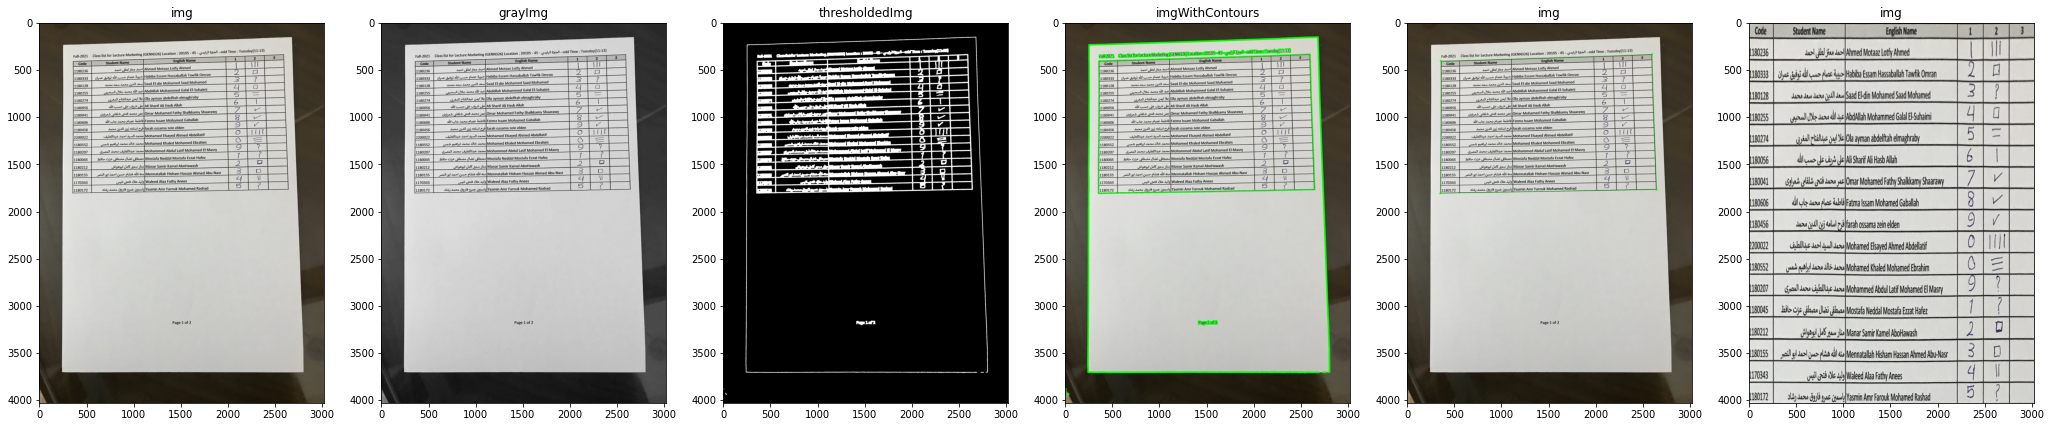

In [7]:
img=io.imread('./Data set/grade sheet/1.jpg')
imageArr=getPageWarped(img, thresh1=180)
show_images(imageArr,titles=['img','grayImg','thresholdedImg','imgWithContours','img','img'])
Table_Extracted=np.copy(imageArr[5])


# img=io.imread('./Data set/grade sheet/11.jpg')
# imageArr=getPageWarped(img, thresh1=180)
# show_images(imageArr,titles=['img','grayImg','thresholdedImg','imgWithContours','img','img'])
# Table_Extracted=np.copy(imageArr[5])


# img=io.imread('./Data set/grade sheet/13.jpg')
# imageArr=getPageWarped(img, thresh1=180)
# show_images(imageArr,titles=['img','grayImg','thresholdedImg','imgWithContours','img','img'])
# Table_Extracted=np.copy(imageArr[5])

# imageArr=getPageWarped(imageArr[5], thresh1=180)
# show_images(imageArr,titles=['img','grayImg','thresholdedImg','imgWithContours','img','img'])
# Table_Extracted=np.copy(imageArr[5])

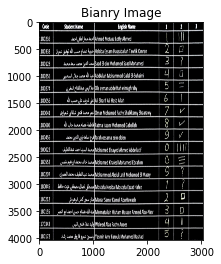

In [8]:
# print(np.max(Table_Extracted))
# print(np.shape(Table_Extracted))
# Table_Extracted=rgb2gray(Table_Extracted)
# Converting table to binary
thresh,img_bin = cv2.threshold(Table_Extracted,128,255,cv2.THRESH_BINARY)
# thresh,img_bin = cv2.threshold(Table_Extracted,128,255,cv2.THRESH_OTSU)

img_bin = 255-img_bin
show_images([img_bin],titles=['Bianry Image'])

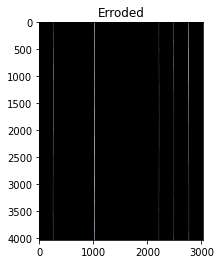

In [9]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//150))
# print(vertical_kernel)
eroded_image = cv2.erode(img_bin, vertical_kernel, iterations=10)
show_images([eroded_image],titles=['Erroded'])

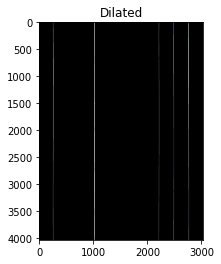

In [10]:
vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=10)
show_images([vertical_lines],titles=['Dilated'])

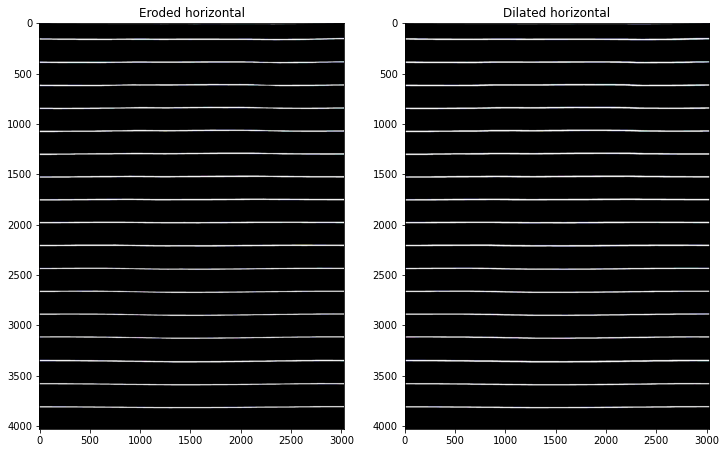

In [11]:
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//150, 1))
image_2 = cv2.erode(img_bin, hor_kernel, iterations=10)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=10)
show_images([image_2,horizontal_lines],titles=['Eroded horizontal','Dilated horizontal'])

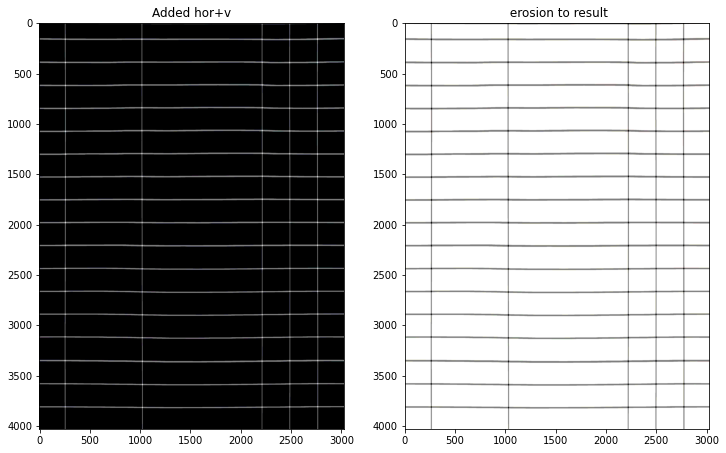

In [12]:
vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines_2 = cv2.erode(~vertical_horizontal_lines, cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)), iterations=3)
show_images([vertical_horizontal_lines,vertical_horizontal_lines_2],titles=['Added hor+v',' erosion to result'])

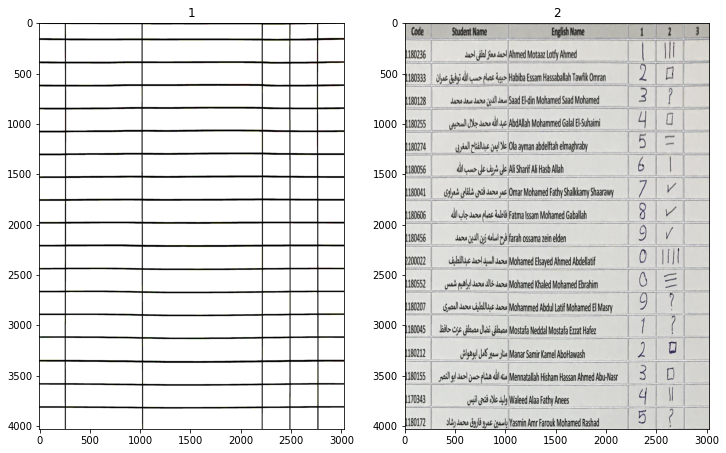

In [13]:
thresh, vertical_horizontal_lines_3 = cv2.threshold(vertical_horizontal_lines_2,128,255, cv2.THRESH_BINARY)
b_image = cv2.bitwise_not(cv2.bitwise_xor(Table_Extracted,vertical_horizontal_lines_3))
show_images([vertical_horizontal_lines_3,b_image],titles=['1','2'])

In [14]:
img1 = cv2.cvtColor(vertical_horizontal_lines_3, cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(img1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [15]:
boundingBoxes = [cv2.boundingRect(c) for c in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),
key=lambda x:x[1][1]))

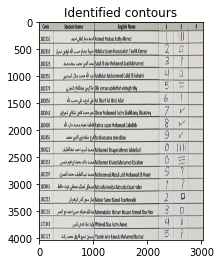

In [16]:
boxes = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if (w<1000 and h<500):
        image = cv2.rectangle(Table_Extracted,(x,y),(x+w,y+h),(255,255,255),2)#0 255 0
        boxes.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

In [17]:
rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
    if(boxes[i][1]<=previous[1]+mean/2):
        columns.append(boxes[i])
        previous=boxes[i]
        if(i==len(boxes)-1):
            rows.append(columns)
    else:
        rows.append(columns)
        columns=[]
        previous = boxes[i]
        columns.append(boxes[i])
print("Rows")
for row in rows:
    print(row)

210.7314814814815
Rows
[[2768, 5, 256, 146], [0, 5, 256, 149], [266, 9, 751, 146], [2492, 10, 266, 146], [2218, 14, 265, 144]]
[[2767, 165, 257, 218], [0, 168, 257, 216], [267, 170, 750, 215], [2492, 171, 265, 214], [2218, 173, 265, 214]]
[[2766, 394, 258, 217], [268, 398, 749, 216], [0, 399, 258, 214], [2492, 400, 265, 213], [2219, 400, 263, 214]]
[[2766, 624, 258, 215], [268, 625, 750, 216], [2218, 626, 264, 213], [2492, 629, 264, 211], [0, 629, 258, 212]]
[[2219, 851, 264, 214], [269, 851, 748, 217], [2766, 853, 258, 214], [2492, 855, 264, 212], [0, 856, 259, 213]]
[[2220, 1078, 263, 213], [268, 1079, 750, 215], [2767, 1081, 257, 212], [2493, 1082, 264, 211], [0, 1086, 259, 210]]
[[2220, 1304, 264, 213], [268, 1306, 749, 215], [2493, 1308, 264, 211], [2768, 1310, 256, 210], [0, 1312, 258, 211]]
[[2220, 1531, 264, 213], [268, 1533, 750, 214], [2494, 1534, 264, 211], [2768, 1536, 256, 210], [0, 1538, 258, 211]]
[[2220, 1760, 265, 212], [2494, 1761, 264, 211], [268, 1761, 751, 212], [2

In [18]:
total_cells=0
for i in range(len(row)):
    if len(row[i]) > total_cells:
        total_cells = len(row[i])
print(total_cells)

4


In [19]:
center = [int(rows[i][j][0]+rows[i][j][2]/2) for j in range(len(rows[i])) if rows[0]]
print(center)
center=np.array(center)
center.sort()
print(center)

[2351, 643, 2895, 2624, 129]
[ 129  643 2351 2624 2895]


In [20]:
boxes_list = []
for i in range(len(rows)):
    l=[]
    for k in range(total_cells):
        l.append([])
#     print(l)
    for j in range(len(rows[i])):
        diff = abs(center-(rows[i][j][0]+rows[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
#         print(indexing)
        l[indexing-1].append(rows[i][j])
    boxes_list.append(l)
for box in boxes_list:
    print(box)

[[[266, 9, 751, 146]], [[2218, 14, 265, 144]], [[2492, 10, 266, 146]], [[2768, 5, 256, 146], [0, 5, 256, 149]]]
[[[267, 170, 750, 215]], [[2218, 173, 265, 214]], [[2492, 171, 265, 214]], [[2767, 165, 257, 218], [0, 168, 257, 216]]]
[[[268, 398, 749, 216]], [[2219, 400, 263, 214]], [[2492, 400, 265, 213]], [[2766, 394, 258, 217], [0, 399, 258, 214]]]
[[[268, 625, 750, 216]], [[2218, 626, 264, 213]], [[2492, 629, 264, 211]], [[2766, 624, 258, 215], [0, 629, 258, 212]]]
[[[269, 851, 748, 217]], [[2219, 851, 264, 214]], [[2492, 855, 264, 212]], [[2766, 853, 258, 214], [0, 856, 259, 213]]]
[[[268, 1079, 750, 215]], [[2220, 1078, 263, 213]], [[2493, 1082, 264, 211]], [[2767, 1081, 257, 212], [0, 1086, 259, 210]]]
[[[268, 1306, 749, 215]], [[2220, 1304, 264, 213]], [[2493, 1308, 264, 211]], [[2768, 1310, 256, 210], [0, 1312, 258, 211]]]
[[[268, 1533, 750, 214]], [[2220, 1531, 264, 213]], [[2494, 1534, 264, 211]], [[2768, 1536, 256, 210], [0, 1538, 258, 211]]]
[[[268, 1761, 751, 212]], [[2220,

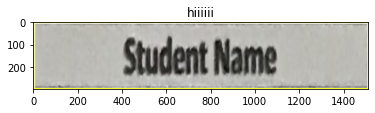

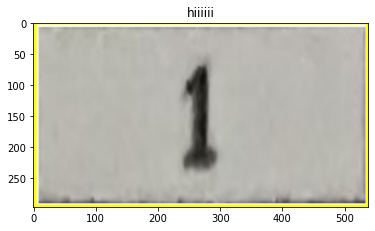

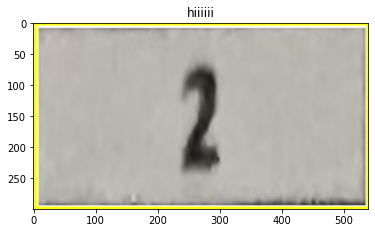

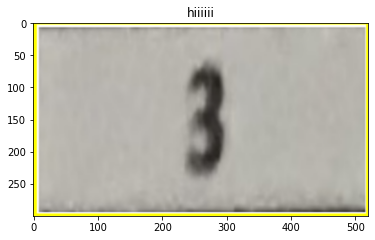

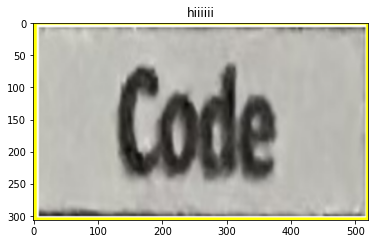

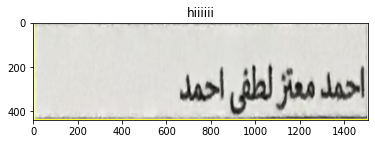

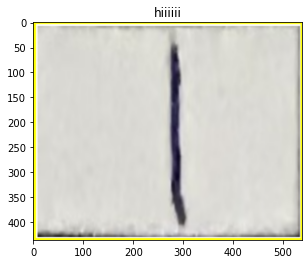

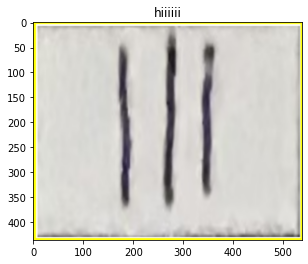

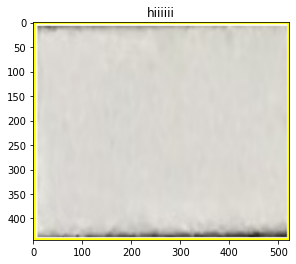

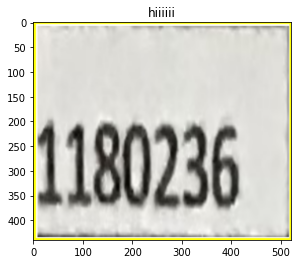

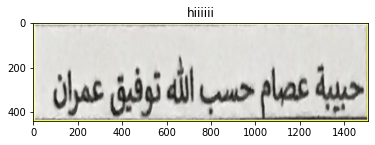

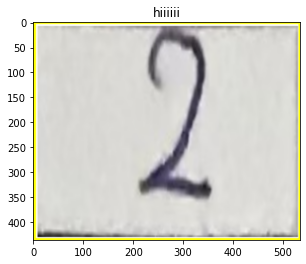

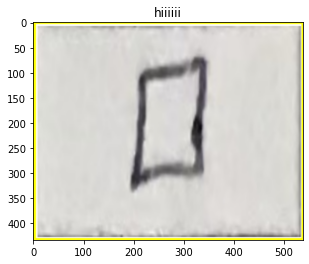

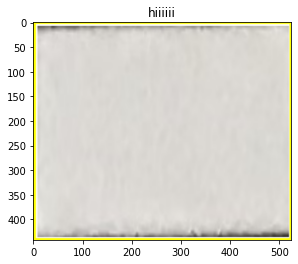

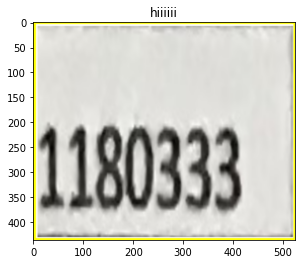

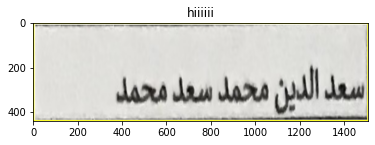

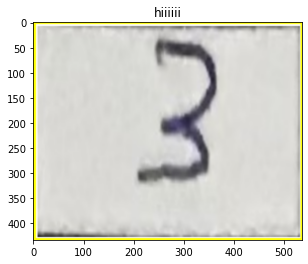

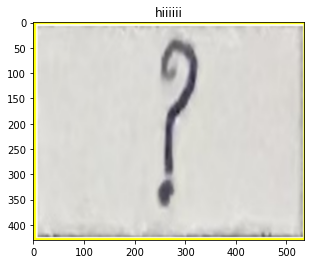

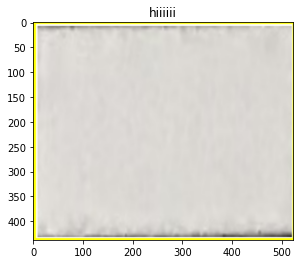

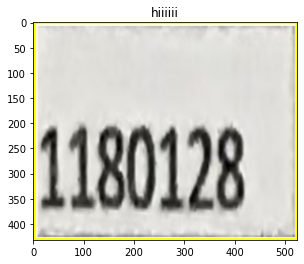

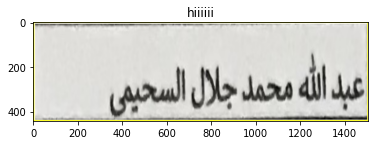

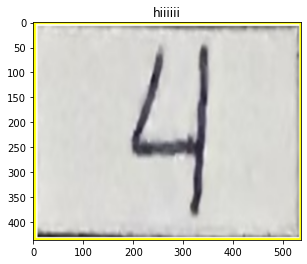

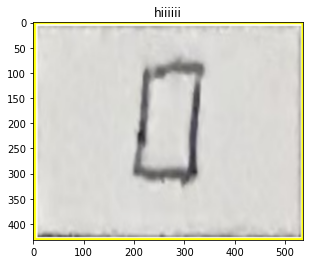

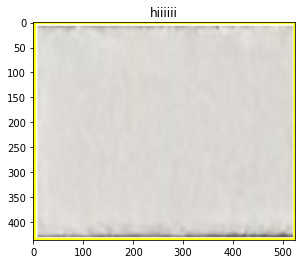

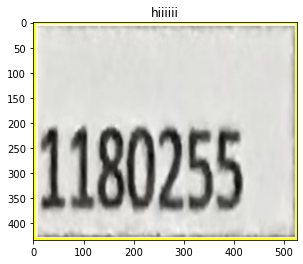

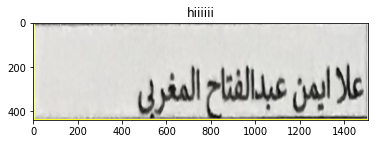

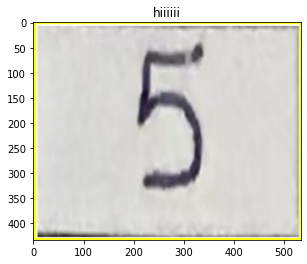

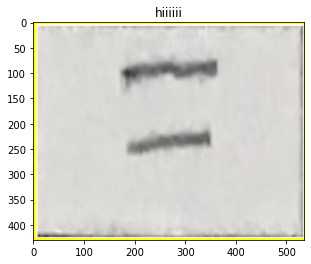

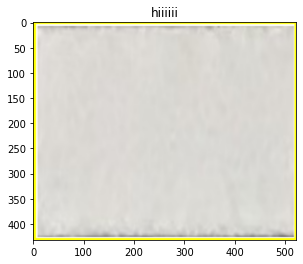

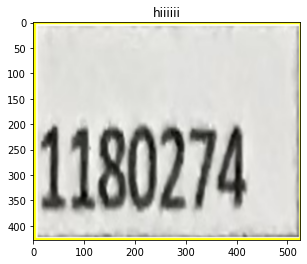

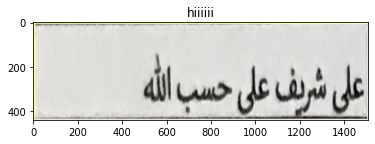

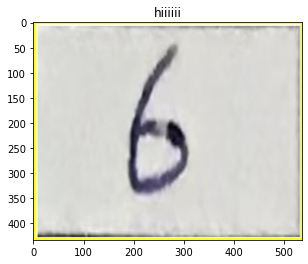

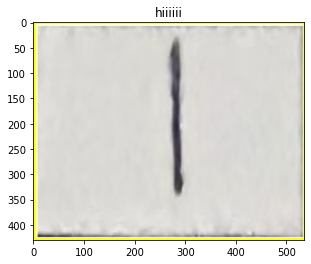

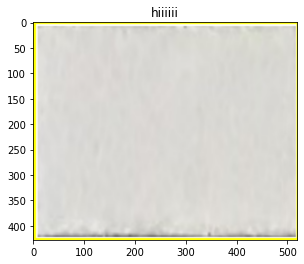

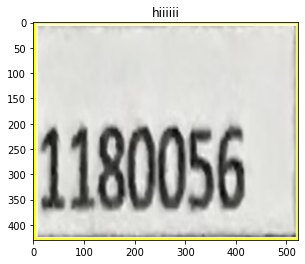

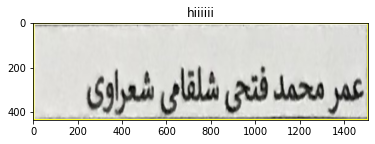

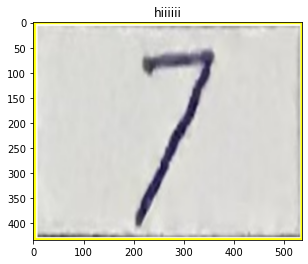

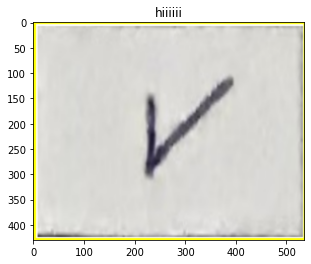

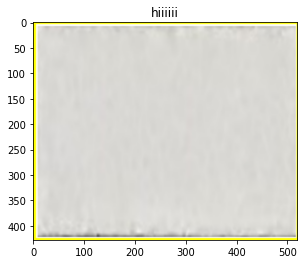

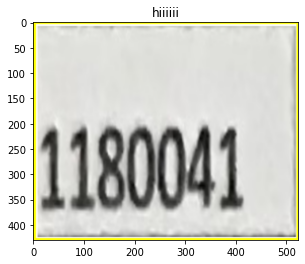

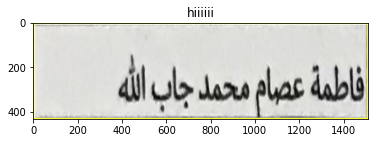

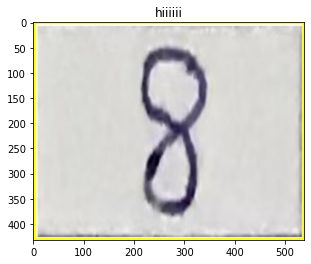

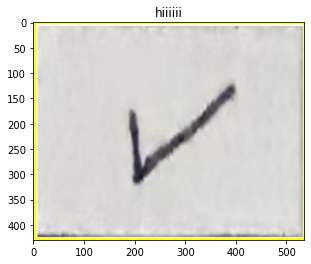

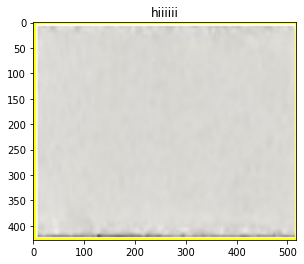

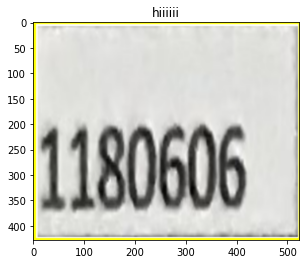

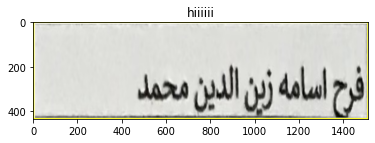

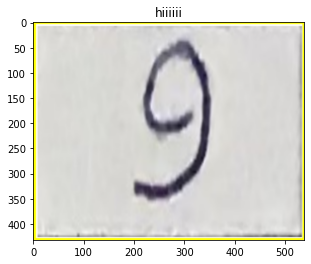

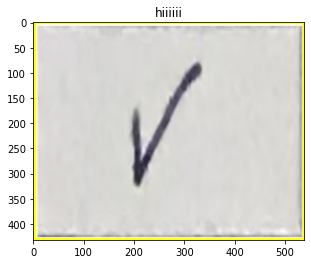

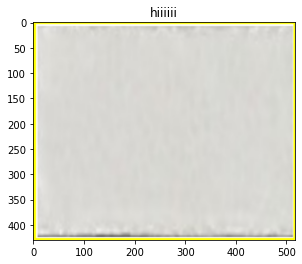

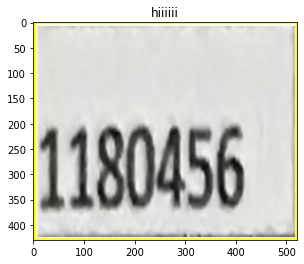

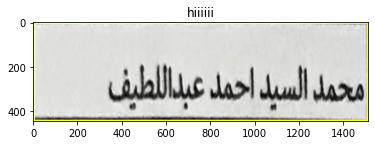

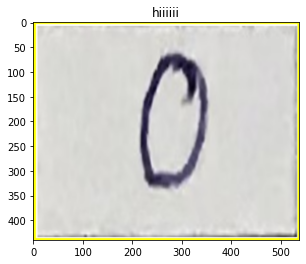

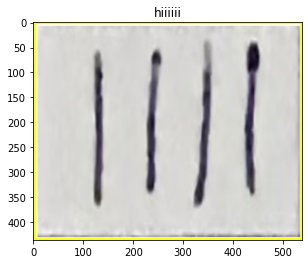

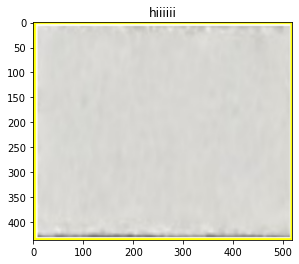

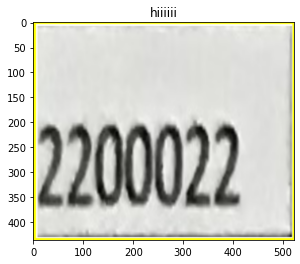

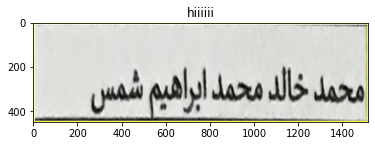

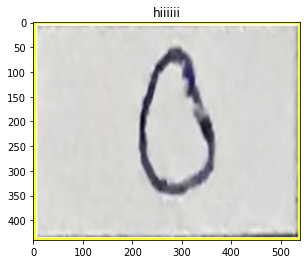

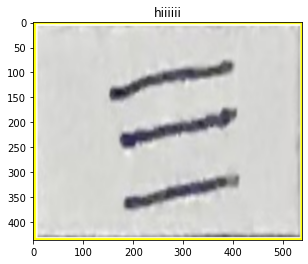

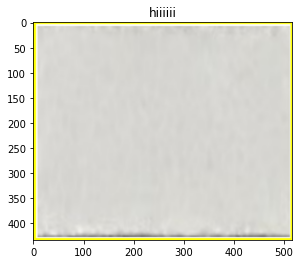

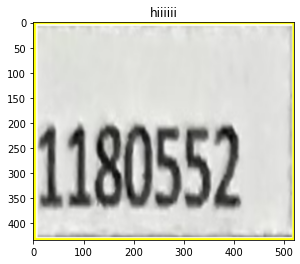

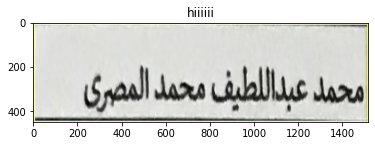

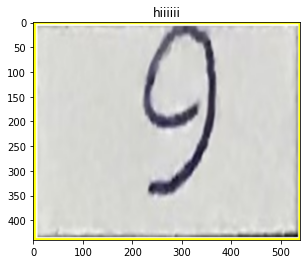

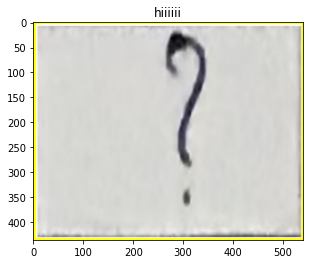

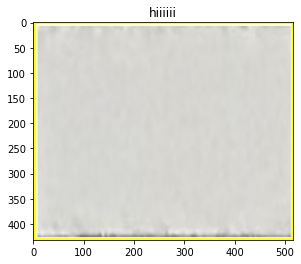

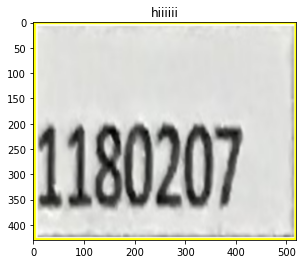

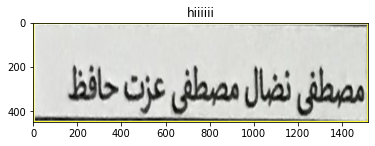

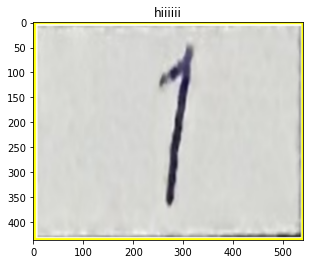

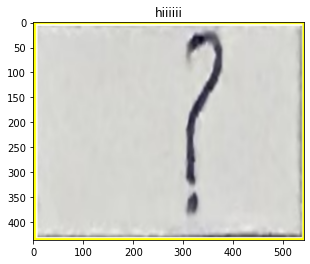

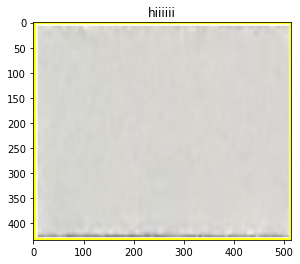

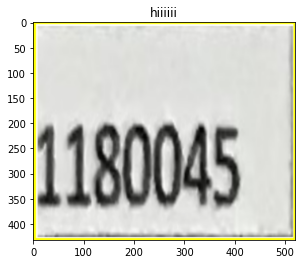

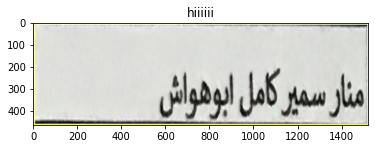

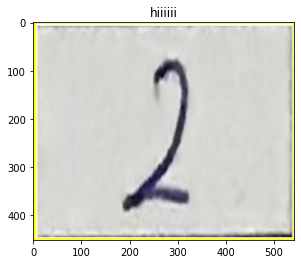

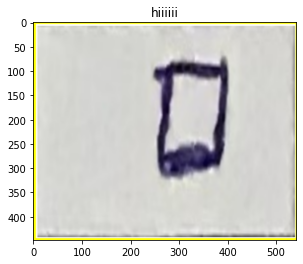

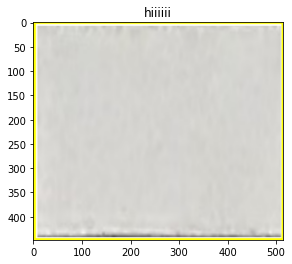

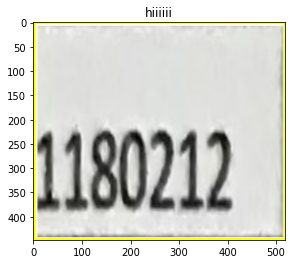

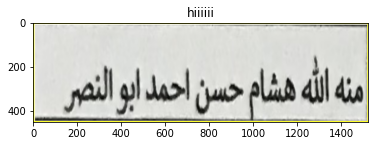

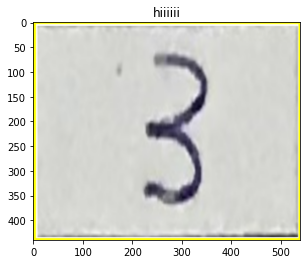

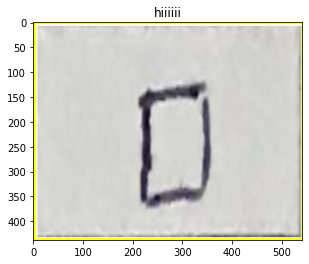

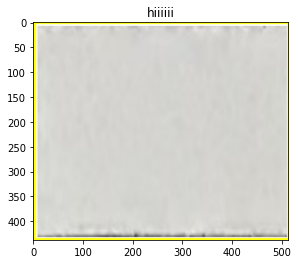

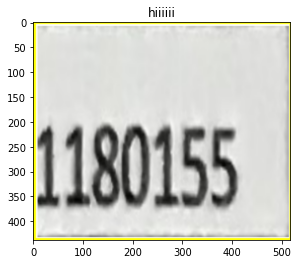

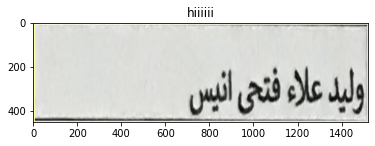

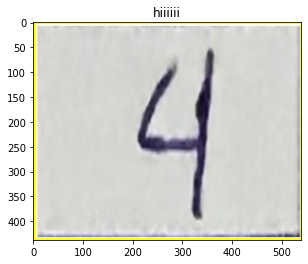

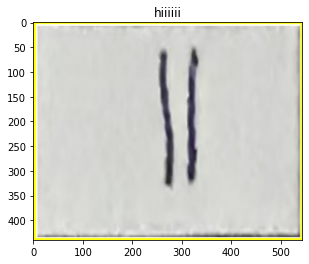

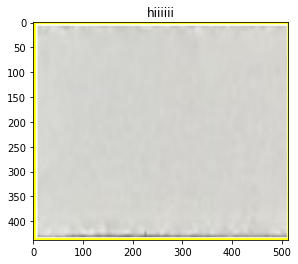

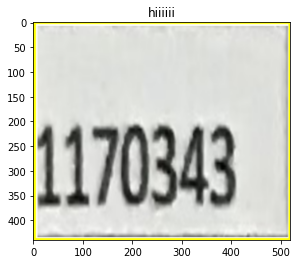

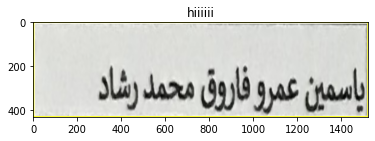

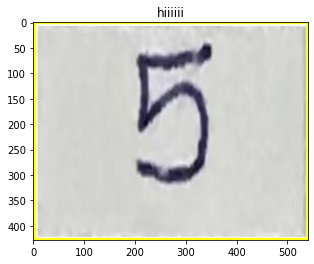

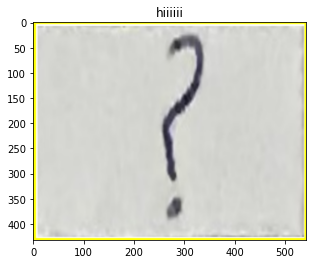

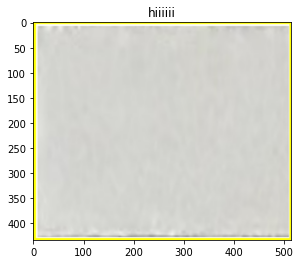

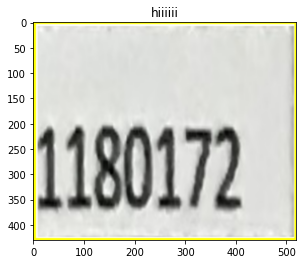

In [21]:
dataframe_final=[]
for i in range(len(boxes_list)):
    for j in range(len(boxes_list[i])):
        s=''
        if(len(boxes_list[i][j])==0):
            dataframe_final.append(' ')
        else:
            for k in range(len(boxes_list[i][j])):
                y,x,w,h = boxes_list[i][j][k][0],boxes_list[i][j][k][1], boxes_list[i][j][k][2],boxes_list[i][j][k][3]
                roi = image[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)
                show_images([erosion],titles=['hiiiiii'])
                io.imsave('./cells/'+str(i)+str(j)+str(k)+'.jpg',erosion)
#                 out = pytesseract.image_to_string(erosion)
#                 if(len(out)==0):
#                     out = pytesseract.image_to_string(erosion)
#                 s = s +" "+ out
#             dataframe_final.append(s)
# print(dataframe_final)

In [22]:
arr = np.array(dataframe_final)

In [23]:
import pandas as pd
dataframe = pd.DataFrame(arr.reshape(len(rows), total_cells))
data = dataframe.style.set_properties(align="left")
#print(data)
#print(dataframe)
d=[]
for i in range(0,len(rows)):
    for j in range(0,total_cells):
        print(dataframe[i][j],end=" ")
print()

ValueError: cannot reshape array of size 0 into shape (18,4)

In [ ]:
dataframe.to_csv("output.csv")

In [ ]:
print(contours)
print(np.shape(contours))